---

Welcome to the GROUP VIDEO starter code.

Your group task is to record a video of 10 - 15 minutes CLEANING DATA and DEVELOPING 2 MODELS using the RBA_KYC_Accounts_ALL_Ids.xlsx dataset. You should use Pandas, Matplotlib and Scikit Learn (Sklearn) libraries only if possible. Your video should include:

*    A quick explanation of Pandas, Matplotlib and Sklearn, specially including their histories. (less than a minute)
*    A quick Exploratory Data Analysis of the Risk Based Approach - Know Your Customer data set.
*    Using the EDA, explain the problemms of data quality in this data set.
*    Research about data preparation with Python. Propose and implement ways to clean, input missing and prepare the data for modelling.
*	Then, develop one Regression model using rbaValue as target variable.
*	and then, develop one binary Classification model using Risk_Description setting Risk_Description = Low as 0 and else 1 (Medium or High)
*    Remember to validate your model performance.

ps. You can apply any of the steps in the model development:
*    (A) Sampling and Performance definition
*    (B) Feature Engineering
*    (C) Preprocessing
*    (D) Model Fit
*    (D.1) Feature Selection
*    (D.2) Hyper parameter Optimization
*    (E) Model Evaluation
*    (F) Cross Validation
But be coincious of time it may take to do it all, so avoid overcomplicating things.


Please find below couple videos from previous years (different data set and different objective) and from which you'll also learn some Python ideas:

* 2018 MBD01 Group E Variable Transformation - https://www.youtube.com/watch?v=j_0HQ2UF_L0
* 2019 - Risk & Fraud Analytics - Scikit Learn & Lending Club - Group C - https://www.youtube.com/watch?v=oTmHMXsksM8

---

### Importing the database: RBA_KYC_Accounts_ALL_Ids.xlsx

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('RBA_KYC_Accounts_ALL_Ids.xlsx')

df_original = df.copy()



## Checking some quick statistics



In [3]:
df.describe()

org_code     branchCode    customerId   customerType  residentStatus  \
count  224868.0  224868.000000  2.248680e+05  224868.000000   224868.000000   
mean        1.0     448.451323  4.394503e+16       1.114418        1.021221   
std         0.0     228.193308  2.349321e+16       0.318319        0.144122   
min         1.0     201.000000  2.020028e+09       1.000000        1.000000   
25%         1.0     208.000000  2.070207e+16       1.000000        1.000000   
50%         1.0     401.000000  4.011205e+16       1.000000        1.000000   
75%         1.0     701.000000  7.012410e+16       1.000000        1.000000   
max         1.0     805.000000  8.052929e+16       2.000000        2.000000   

         age_in_year  birthCountry    profession    companyType  lastUpdate  \
count  220153.000000           0.0  79748.000000  114574.000000         0.0   
mean       41.310575           NaN     18.309487      49.857577         NaN   
std        16.000536           NaN      6.586481       6.736115         NaN   
min         1.000000           NaN      1.000000       1.000000         NaN   
25%        31.000000           NaN     20.000000      51.000000         NaN   
50%        41.000000           NaN     20.000000      51.000000         NaN   
75%        52.000000           NaN     21.000000      51.000000         NaN   
max       119.000000           NaN     39.000000     100.000000         NaN   

       ...  number_of_cash_dep_90_days  avg_cash_deposit_90_days  \
count  ...               224868.000000              2.248680e+05   
mean   ...                    0.491422             -1.113435e+03   
std    ...                    5.335240              3.028084e+04   
min    ...                    0.000000             -5.482044e+06   
25%    ...                    0.000000              0.000000e+00   
50%    ...                    0.000000              0.000000e+00   
75%    ...                    0.000000              0.000000e+00   
max    ...                 1267.000000              0.000000e+00   

       number_of_deposit_90_days  avg_of_dep_90_days  \
count              224868.000000        2.248680e+05   
mean                    1.131437       -3.540383e+03   
std                    19.713739        9.151602e+04   
min                     0.000000       -1.654371e+07   
25%                     0.000000        0.000000e+00   
50%                     0.000000        0.000000e+00   
75%                     0.000000        0.000000e+00   
max                  3292.000000        5.867291e+05   

       number_of_cash_wd_90_days  avg_of_cash_wd_90_days  \
count              224868.000000            2.248680e+05   
mean                    0.254305            4.763851e+02   
std                     1.175586            2.028110e+04   
min                     0.000000            0.000000e+00   
25%                     0.000000            0.000000e+00   
50%                     0.000000            0.000000e+00   
75%                     0.000000            0.000000e+00   
max                    78.000000            8.394000e+06   

       number_of_wd_90_days  avg_of_wd_90_days  score_card_Desc       rbaValue  
count         224868.000000       2.248680e+05              0.0  224868.000000  
mean               0.868518       2.450953e+03              NaN      17.624194  
std               12.373992       5.819818e+04              NaN       8.368345  
min                0.000000       0.000000e+00              NaN       4.080000  
25%                0.000000       0.000000e+00              NaN      13.330000  
50%                0.000000       0.000000e+00              NaN      16.530000  
75%                0.000000       0.000000e+00              NaN      21.330000  
max             2858.000000       9.942530e+06              NaN     100.000000  

[8 rows x 32 columns]

In [4]:
df.shape

(224868, 47)

## Checking for percentage (%) of missing values

In [5]:
100*df.isnull().sum()/df.isnull().count()

org_code                        0.000000
branchCode                      0.000000
customerId                      0.000000
fullaccount                     0.000000
customerType                    0.000000
creationDate                    0.000000
onboarding                      0.000000
residentStatus                  0.000000
residentCountry                 0.265044
nationalityOriginal             1.529342
extraNationality               99.202643
dateOfBirth                     2.096786
age_in_year                     2.096786
birthCountry                  100.000000
birthPlace                      9.713254
profession                     64.535639
companyType                    49.048331
giinCode                       99.994664
lastUpdate                    100.000000
status                          0.000000
ledgerCode                      0.000000
accountCurrency                 0.000000
jointAccount                    0.000000
IsBlackListed                   0.000000
CUS_CLASS       

## Making some histograms

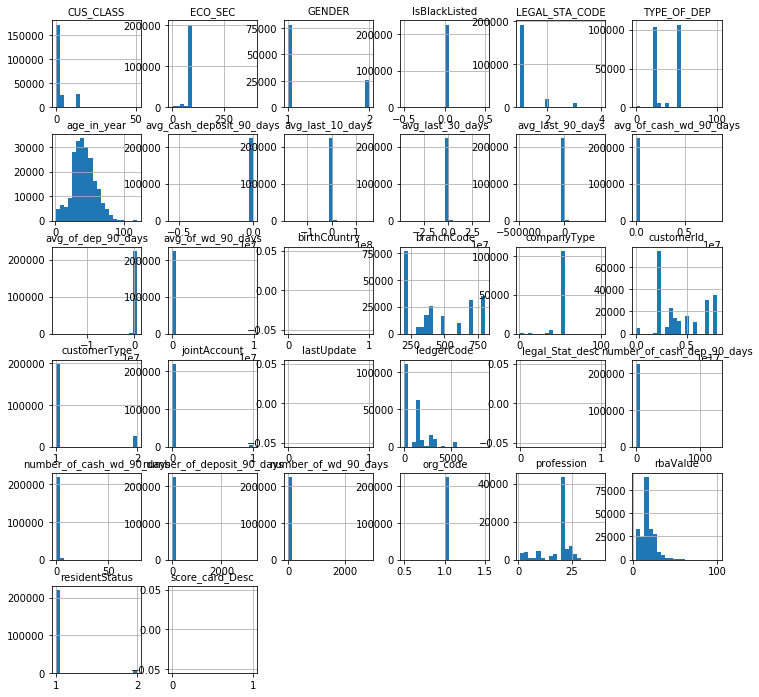

In [6]:
%matplotlib inline
import matplotlib.pylab as plt
attribute_columns = list(df.columns)
if True:
    fontsize = 10
    fig = df[attribute_columns].hist(bins = 20, figsize = (12, 12),
                                       xlabelsize=fontsize,
                                       ylabelsize=fontsize)
    for x in fig.ravel():
        x.title.set_size(fontsize)
else:
    nrows = (len(attribute_columns)+1) // 2
    plt.figure(figsize=(12,25))
    for i in range(len(attribute_columns)):
        name = attribute_columns[i]
        plt.subplot(nrows,2,i+1)
        data[name].hist()
        plt.title(name, fontsize=14)
    
plt.show()

### Now, is your group turn: 
...

---

<img src="alpha_team.JPG" width=100 height=100 align="right">

Author: Group A - (Ben Cherian, Chiara Simonetti, Ignacio Arraiz, Juan D'Alessandro, Laura Casero and Mansour Mawla) 

Last revision: 28/10/2019

---

## 1. Exploratory Data Analysis

In [7]:
# Identify the variable types that we have on the dataset
df.dtypes

org_code                        int64
branchCode                      int64
customerId                      int64
fullaccount                    object
customerType                    int64
creationDate                   object
onboarding                     object
residentStatus                  int64
residentCountry                object
nationalityOriginal            object
extraNationality               object
dateOfBirth                    object
age_in_year                   float64
birthCountry                  float64
birthPlace                     object
profession                    float64
companyType                   float64
giinCode                       object
lastUpdate                    float64
status                         object
ledgerCode                      int64
accountCurrency                object
jointAccount                    int64
IsBlackListed                   int64
CUS_CLASS                       int64
ECO_SEC                         int64
TYPE_OF_DEP 

### 1.1 Create a report with a complete EDA of the dataset

In [8]:
# Removing duplicate rows in the dataset
df = df.drop_duplicates(subset=None, keep='first', inplace=False)

In [9]:
# Import pandas profiling to obtain a complete exploratory data analysis

import pandas_profiling


In [10]:
profile = df.profile_report(title='RBA KYC Profiling Report')
profile.to_file(output_file="EDA_profile.html")

df.profile_report(style={'full_width':True})

## 2. Data preparation for modelling: 

### 2.1 Data cleaning based on EDA

#### 2.1.1 Remove rejected columns

Based on the pandas profiling, some columns might be removed from the dataset, due to the following reasons:
* Constant value: "birthCountry", "date_of_assessment", "IsBlackListed","lastUpdate","legal_Stat_desc","org_code","score_card_Desc","status"

* Highly correlated with other variables within the dataset: "avg_last_30_days", "avg_last_90_days", "customerID", "TYPE_OF_DEP"

* Recoding of another variable: "rbaGradeAbrv"

* Variables used as IDs for the customers or offices: "fullaccount" and "branchCode"

In [11]:
df.drop(['avg_last_30_days','avg_last_90_days','birthCountry','customerId','date_of_assessment','IsBlackListed','lastUpdate','legal_Stat_desc','org_code','score_card_Desc','status','TYPE_OF_DEP','rbaGradeAbrv'], axis = 1, inplace = True)
df.drop(['fullaccount','branchCode'], axis = 1, inplace = True)

Date of Birth is not rejected by the pandas EDA profiling. However, since we have a variable with the age of the customer, we will remove this column

In [12]:
df.drop(['dateOfBirth'],axis = 1, inplace = True)

In order to be able to use the variable "creationDate_indays", we transform it into the number of days since the creation date, and then we remove the column because it will not be useful anymore

In [13]:
df['creationDate_indays'] = df['creationDate'].astype('datetime64[ns]').max()-df['creationDate'].astype('datetime64[ns]') 
df['creationDate_indays'].head()

0   1295 days
1   1860 days
2   1860 days
3   1860 days
4   1860 days
Name: creationDate_indays, dtype: timedelta64[ns]

In [14]:
df.drop(['creationDate'],axis = 1, inplace = True)

#### 2.1.2 Cleaning NaN values from the dataset

##### Removing variables with high percentage of NaN values

In [15]:
df.drop(['companyType','GENDER','giinCode','profession'], axis = 1, inplace = True)

##### Cleaning the rest of NaN values from the dataset

It seems that extra nationality NaN values corresponds to customers with no extra nationality. This is the reason why there are so many. Let's include the category "None" for the NaN values, just in case is an importan feature. If it is not, it will be discarded further in the pipelin with the feature selection

In [16]:
df.extraNationality=df.extraNationality.fillna('None') 

Let's check how many rows would we delete by removing the rows of the variable with highest number of NaN values

In [17]:
max(100*df.isnull().sum()/df.isnull().count())

9.71325399790099

In [18]:
100*df.isnull().sum()/df.isnull().count()

customerType                  0.000000
onboarding                    0.000000
residentStatus                0.000000
residentCountry               0.265044
nationalityOriginal           1.529342
extraNationality              0.000000
age_in_year                   2.096786
birthPlace                    9.713254
ledgerCode                    0.000000
accountCurrency               0.000000
jointAccount                  0.000000
CUS_CLASS                     0.000000
ECO_SEC                       0.000000
LEGAL_STA_CODE                1.163349
avg_last_10_days              0.000000
number_of_cash_dep_90_days    0.000000
avg_cash_deposit_90_days      0.000000
number_of_deposit_90_days     0.000000
avg_of_dep_90_days            0.000000
number_of_cash_wd_90_days     0.000000
avg_of_cash_wd_90_days        0.000000
number_of_wd_90_days          0.000000
avg_of_wd_90_days             0.000000
rba_grade_desc                0.000000
score_card                    0.000000
rbaValue                 

The variable is Birthplace, which also have a big amount (>80%) of rows with values containing "???". Therefore, this variable is also removed from the dataset

In [19]:
df.drop(['birthPlace'], axis = 1, inplace = True)

Variables "residentCountry", "nationalityOriginal" is a categorical variable with very high cardinality, which may be probably discarded. For the moment, we will assign the value "Other" to NaN values

In [20]:
df.residentCountry=df.residentCountry.fillna('Other')

df.nationalityOriginal=df.nationalityOriginal.fillna('Other')

In [21]:
100*df.isnull().sum()/df.isnull().count()

customerType                  0.000000
onboarding                    0.000000
residentStatus                0.000000
residentCountry               0.000000
nationalityOriginal           0.000000
extraNationality              0.000000
age_in_year                   2.096786
ledgerCode                    0.000000
accountCurrency               0.000000
jointAccount                  0.000000
CUS_CLASS                     0.000000
ECO_SEC                       0.000000
LEGAL_STA_CODE                1.163349
avg_last_10_days              0.000000
number_of_cash_dep_90_days    0.000000
avg_cash_deposit_90_days      0.000000
number_of_deposit_90_days     0.000000
avg_of_dep_90_days            0.000000
number_of_cash_wd_90_days     0.000000
avg_of_cash_wd_90_days        0.000000
number_of_wd_90_days          0.000000
avg_of_wd_90_days             0.000000
rba_grade_desc                0.000000
score_card                    0.000000
rbaValue                      0.000000
creationDate_indays      

Remove all the rows which contain NaN value for any variable. As maximum, we will remove around 3% of data

In [22]:
df=df.dropna()

In [23]:
sum(100*df.isnull().sum()/df.isnull().count())

0.0

Let's check if there are other types of missing values

In [24]:
missing_values = ["n/a", "na", "--"," "]

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])
missing_data['Missing Percent'] = missing_data['Missing Percent'].apply(lambda x: x * 100)
missing_data.loc[missing_data['Missing Percent'] >0]


Empty DataFrame
Columns: [Total, Missing Percent]
Index: []

At this point, the dataset is clean of missing values

#### 2.1.3 Remove rows with outliers

First, let's plot the boxplot for all the numerical variables within the dataframe

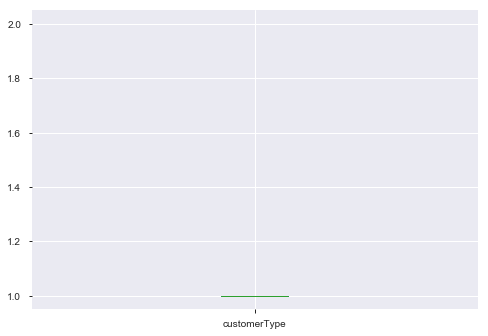

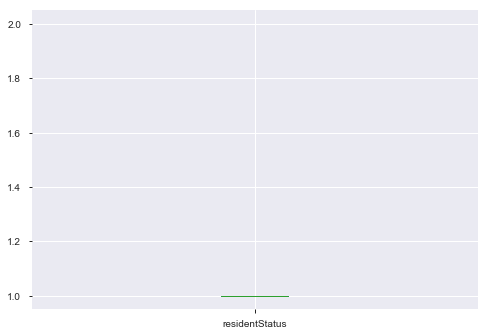

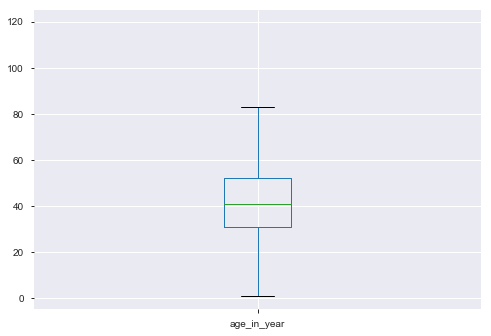

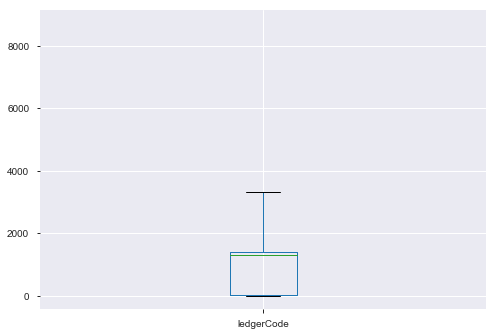

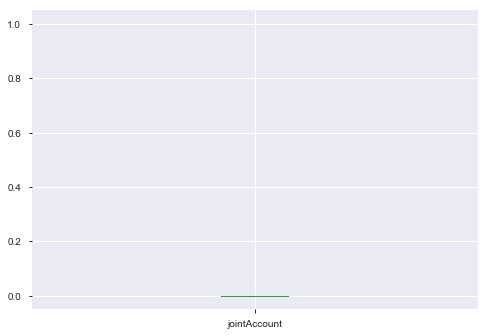

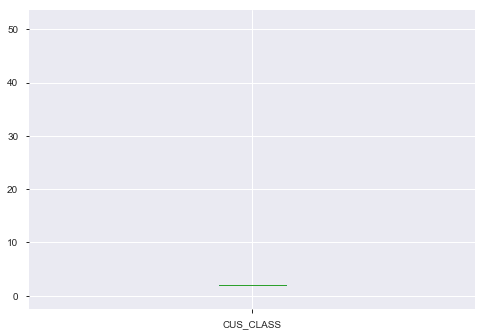

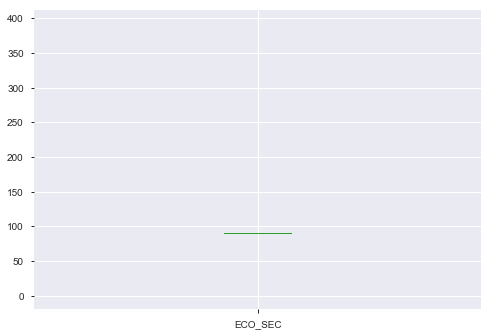

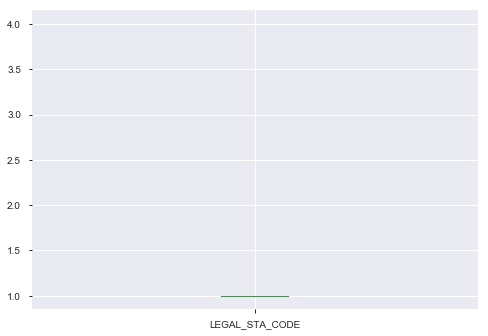

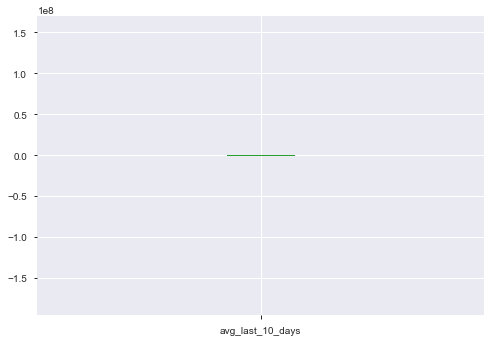

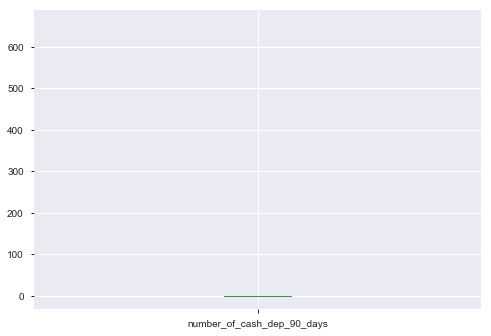

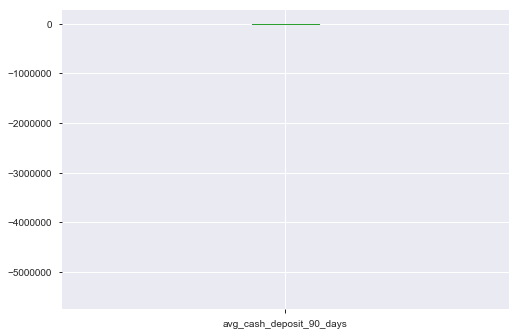

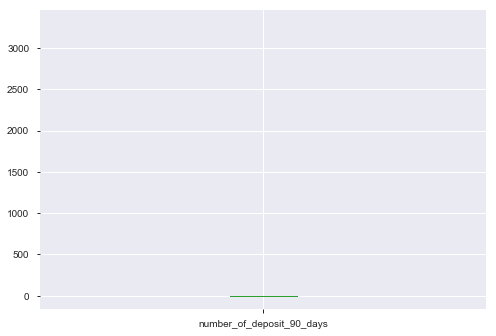

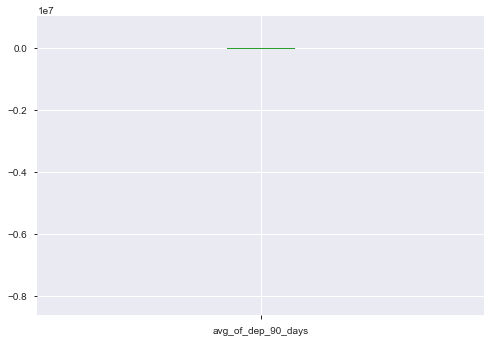

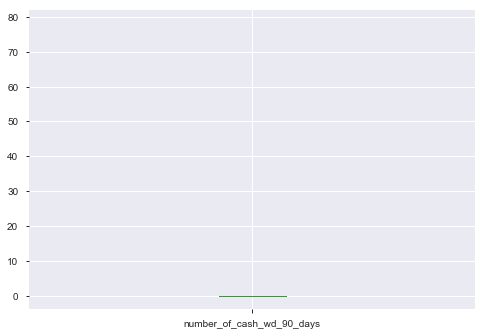

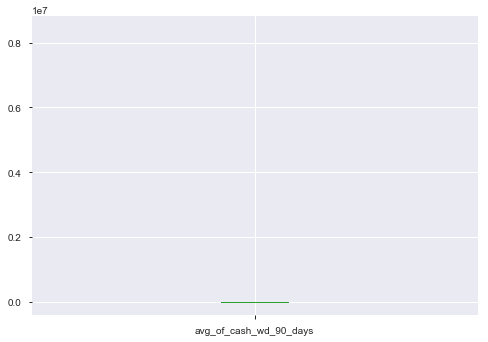

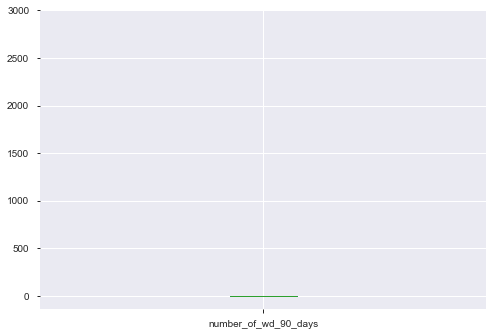

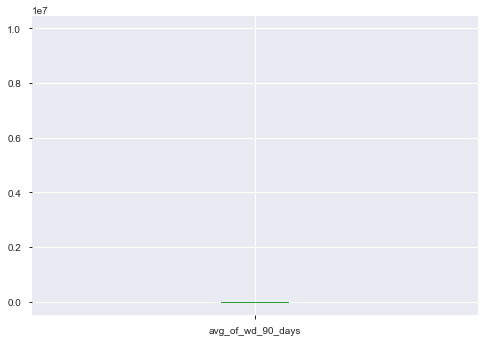

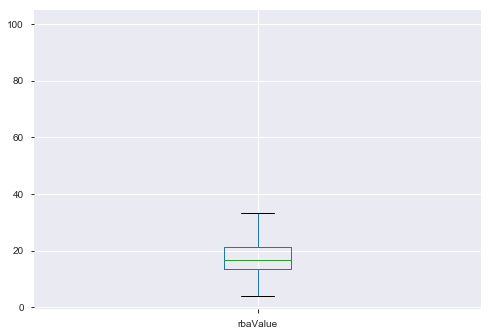

In [25]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

for column in df.select_dtypes(include=numerics):
    plt.figure()
    df.boxplot([column])



Then, we remove the outliers using the 1.5xIQR.

In [25]:
# Create a loop to remove outliers looking only at numerical columns
#outliers_check_cols = ['age_in_year','avg_last_10_days','number_of_cash_dep_90_days','avg_cash_deposit_90_days','number_of_deposit_90_days','avg_of_dep_90_days','number_of_cash_wd_90_days','avg_of_cash_wd_90_days','number_of_wd_90_days','avg_of_wd_90_days','rbaValue']

#for column_name in outliers_check_cols: 
#    q1 = df[column_name].quantile(0.25)
#    q3 = df[column_name].quantile(0.75)
#    iqr = q3-q1 #Interquartile range
#    fence_low  = q1-1.5*iqr
#    fence_high = q3+1.5*iqr
#    df = df.loc[(df[column_name] >= fence_low) & (df[column_name] <= fence_high)]


The outliers cleaning part of the code is commented because it will remove almost 50% of the dataset

In [26]:
profile = df.profile_report(title='RBA KYC Profiling Report')
profile.to_file(output_file="EDA_profile_data_clean.html")


Finally, we rename variable rba_grade_desc as Risk_Description

In [79]:
df['Risk_Description'] = df['rba_grade_desc']
df.drop(['rba_grade_desc'], axis = 1, inplace = True) 

In [80]:
df_clean=df.copy()

### 2.2 Data Vizualization

Let's plot the histograms of the new clean dataset

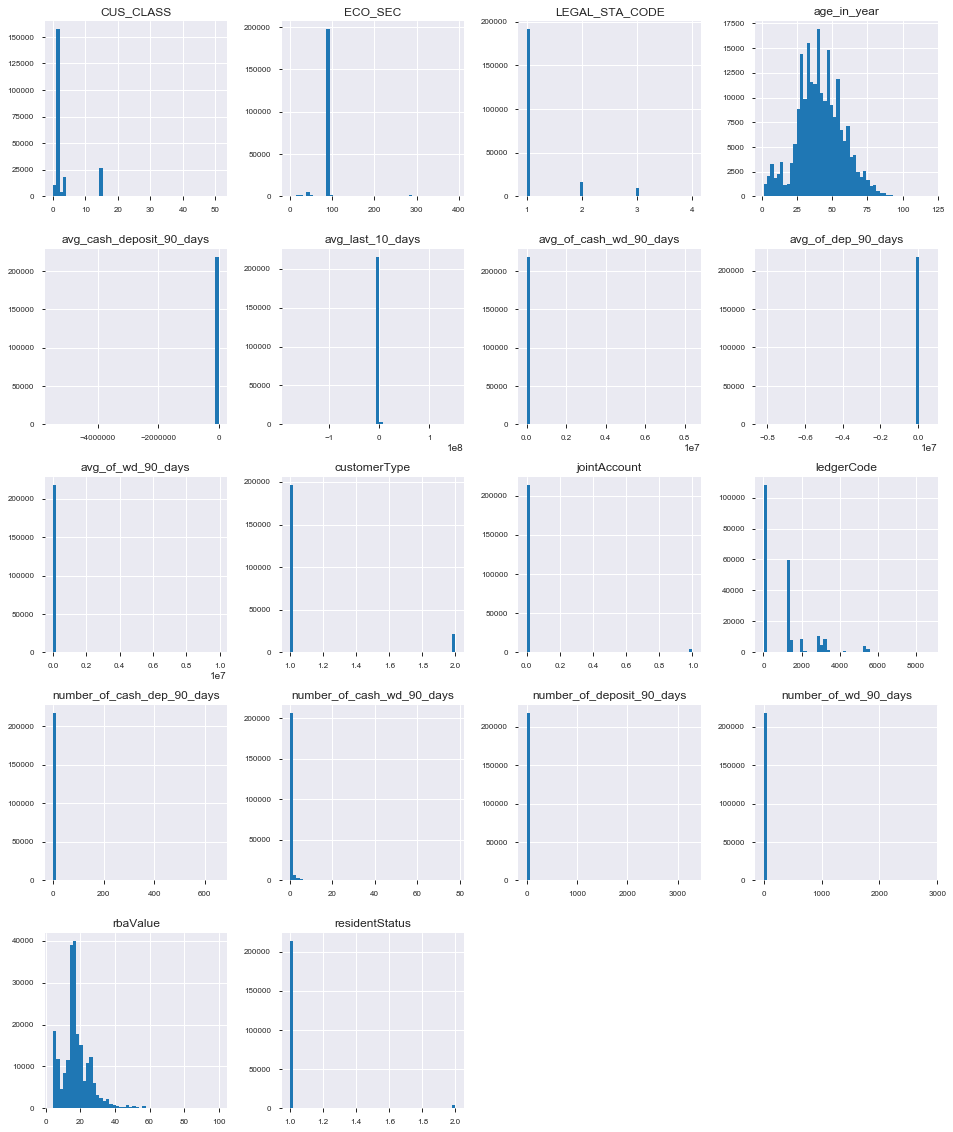

In [28]:
%matplotlib inline

df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

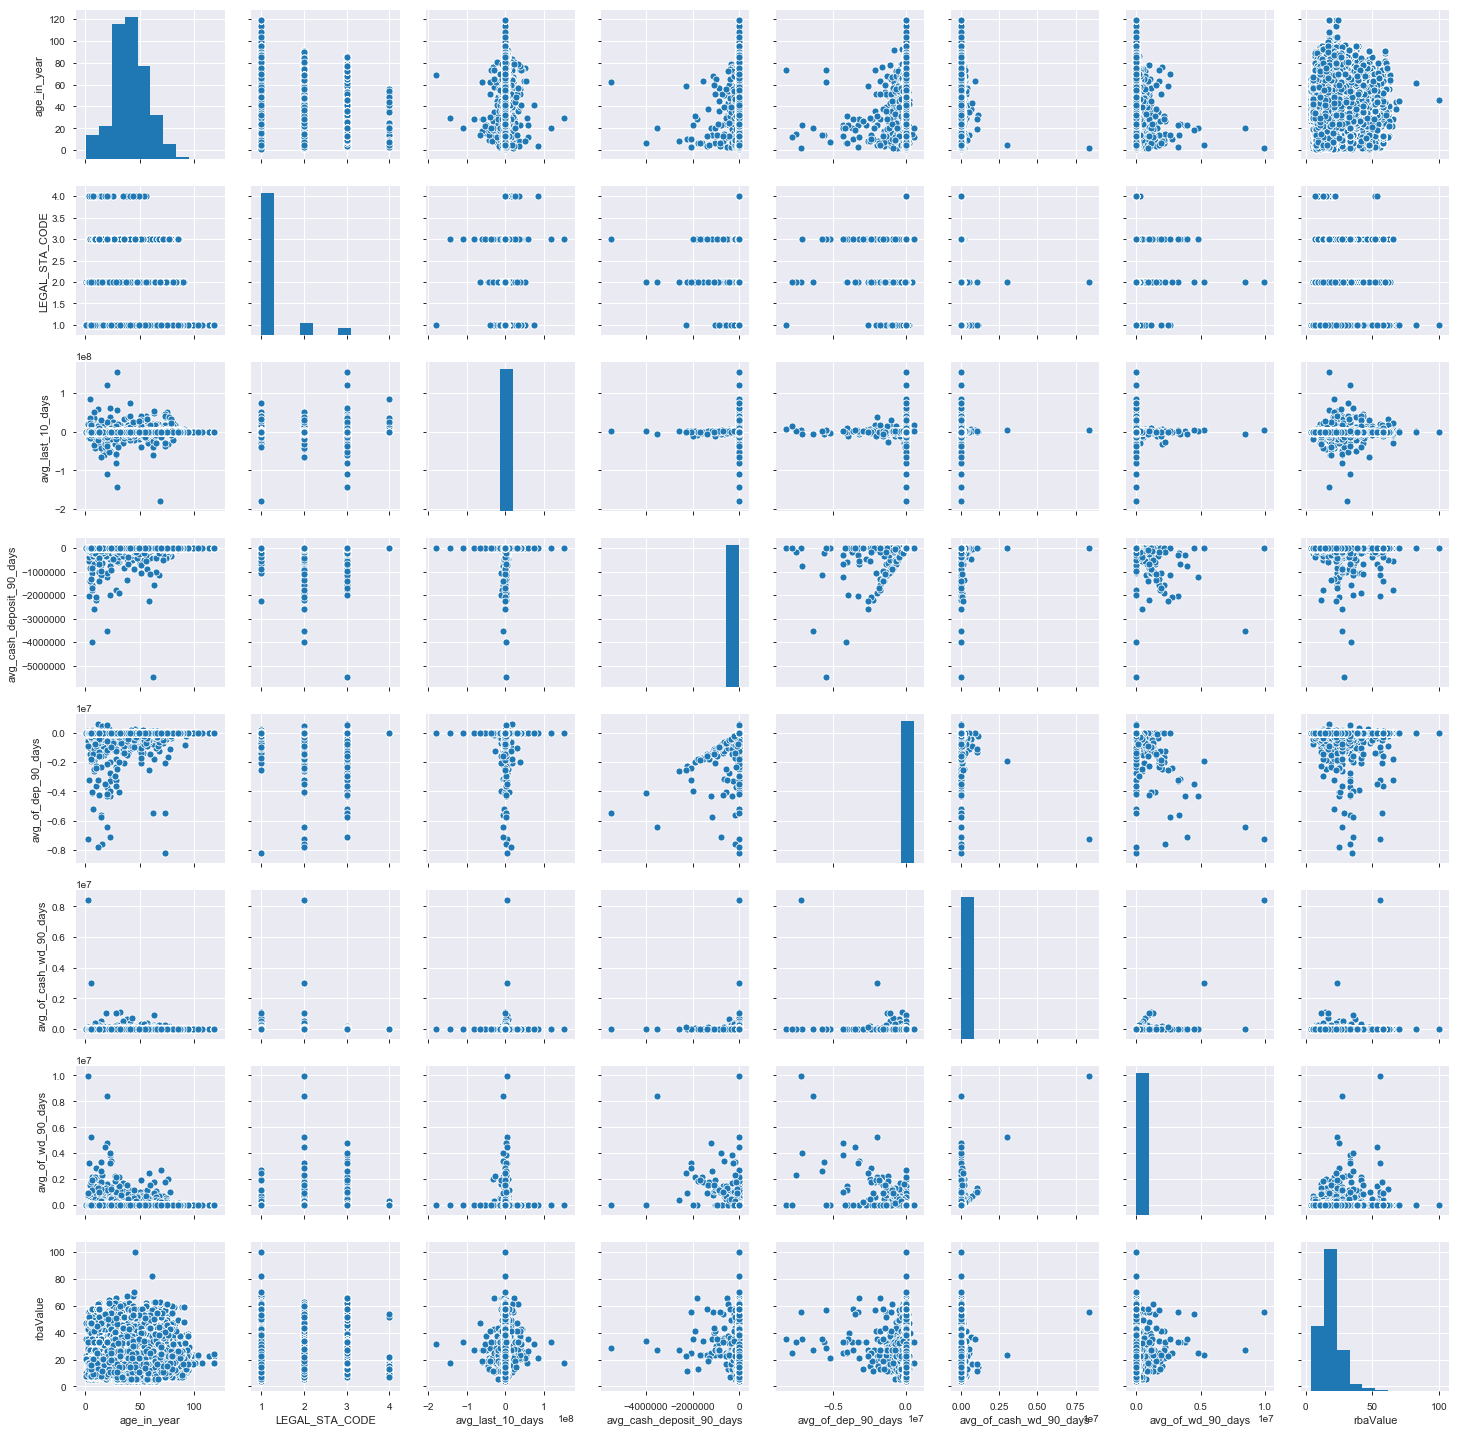

In [29]:
import seaborn as sns
p =sns.pairplot(df.loc[:,df.dtypes == 'float64'])
p

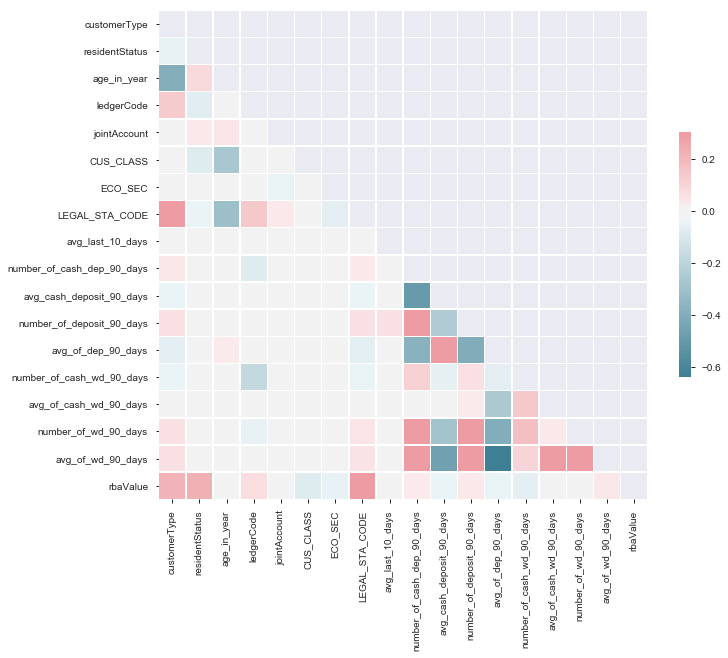

In [31]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## 2.3 Feature engineering

In [81]:
df_regression = df.copy()

In [82]:
df_regression.dtypes

customerType                            int64
onboarding                             object
residentStatus                          int64
residentCountry                        object
nationalityOriginal                    object
extraNationality                       object
age_in_year                           float64
ledgerCode                              int64
accountCurrency                        object
jointAccount                            int64
CUS_CLASS                               int64
ECO_SEC                                 int64
LEGAL_STA_CODE                        float64
avg_last_10_days                      float64
number_of_cash_dep_90_days              int64
avg_cash_deposit_90_days              float64
number_of_deposit_90_days               int64
avg_of_dep_90_days                    float64
number_of_cash_wd_90_days               int64
avg_of_cash_wd_90_days                float64
number_of_wd_90_days                    int64
avg_of_wd_90_days                 

Now, we create a dataframe with the numeric features, and another one with the string features, to process them in a different way:

In [83]:
df_numeric = df_regression.select_dtypes(include=numerics).copy()

In [84]:
# This values will be treated as boolean with the dummies, so we remove them from the numeric dataset
df_numeric.drop(['customerType','jointAccount','residentStatus'], axis = 1, inplace = True)

In [85]:
df_numeric.drop(['ledgerCode','CUS_CLASS','ECO_SEC','LEGAL_STA_CODE'], axis = 1, inplace = True)

In [86]:
df_numeric.dtypes

age_in_year                   float64
avg_last_10_days              float64
number_of_cash_dep_90_days      int64
avg_cash_deposit_90_days      float64
number_of_deposit_90_days       int64
avg_of_dep_90_days            float64
number_of_cash_wd_90_days       int64
avg_of_cash_wd_90_days        float64
number_of_wd_90_days            int64
avg_of_wd_90_days             float64
rbaValue                      float64
dtype: object

In [87]:
df_string=df.select_dtypes(include=['object']).copy()

## 2.3 Feature engineering

#### 2.3.1 Creation of dummy variables for categorical features

Let's build a function that returns dummy variables for each column within a dataframe:

In [88]:
def dummies_dataframe(data):
    dummy=pd.DataFrame()
    for column in data:
        temp = pd.get_dummies(data[column])
        dummy=pd.concat([dummy.reset_index(drop=True), temp.reset_index(drop=True)], axis=1)
        
    return dummy

First, there are some string variables that have high cardinality, and transforming them into dummy variables directly will create hundreds of variables. We will transform these variables in such a way that we will keep the most common labels and then assign the value "Other" to the rest.

In [89]:
df_string.loc[(df_string['residentCountry']!='JO')&(df_string['residentCountry']!='IQ')&(df_string['residentCountry']!='OM'),['residentCountry']]="Other"
df_string.loc[(df_string['nationalityOriginal']!='JO')&(df_string['nationalityOriginal']!='IQ')&(df_string['nationalityOriginal']!='EG'),['nationalityOriginal']]="Other"
df_string.loc[(df_string['extraNationality']!='JO')&(df_string['extraNationality']!='US')&(df_string['extraNationality']!='XK'),['extraNationality']]="None"
df_string.loc[(df_string['accountCurrency']!='JOD')&(df_string['accountCurrency']!='USD')&(df_string['accountCurrency']!='EUR'),['accountCurrency']]="Other"
#CUS_CLASS

In [90]:
df_string.drop(['onboarding'], axis = 1, inplace = True) # It will be included later
df_string.dtypes

residentCountry        object
nationalityOriginal    object
extraNationality       object
accountCurrency        object
score_card             object
Risk_Description       object
dtype: object

In [91]:
df_dummies=dummies_dataframe(df_string)

In [92]:
df_regression.loc[(df_regression['onboarding']=='Y'),['onboarding']]=1
df_regression.loc[(df_regression['onboarding']=='N'),['onboarding']]=0

In [93]:
df_regression.loc[(df_regression['customerType']==1),['customerType']]=0
df_regression.loc[(df_regression['customerType']==2),['customerType']]=1

In [94]:
df_regression.loc[(df_regression['residentStatus']==1),['customerType']]=0
df_regression.loc[(df_regression['residentStatus']==2),['customerType']]=1

In [95]:
df_dummies=pd.concat([df_dummies.reset_index(drop=True), df_regression[['onboarding','customerType','jointAccount','residentStatus']].reset_index(drop=True)], axis=1)
df_dummies.head()

IQ  JO  OM  Other  EG  IQ  JO  Other  JO  None  ...  E-NEW  I-Existing  \
0   0   1   0      0   0   0   1      0   0     1  ...      0           1   
1   0   1   0      0   0   0   1      0   0     1  ...      0           1   
2   0   1   0      0   0   0   1      0   0     1  ...      0           1   
3   0   1   0      0   0   0   1      0   0     1  ...      0           1   
4   0   1   0      0   0   0   1      0   0     1  ...      0           1   

   I-New  High  Low  Medium  onboarding  customerType  jointAccount  \
0      0     0    1       0           0             0             0   
1      0     0    1       0           0             0             0   
2      0     0    1       0           0             0             0   
3      0     0    1       0           0             0             0   
4      0     0    1       0           0             0             0   

   residentStatus  
0               1  
1               1  
2               1  
3               1  
4               1  

[5 rows x 27 columns]

#### 2.3.2 Feature engineering 0 - Numerical data + dummy columns

The first approach only contains the numerical values without any standardadization or procesing and categorical variables recoded as dummies:

In [96]:
df_fe_0 = pd.concat([df_numeric.reset_index(drop=True), df_dummies.reset_index(drop=True)], axis=1)

#### 2.3.3 Feature engineering 1 - Normalized data + dummy columns

##### Data normalization

Let's create a dataset only with the numerical variables normalized:

In [97]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler_fe1=MinMaxScaler()
scaler_fe1_y=MinMaxScaler()

scaler_fe1.fit(df_numeric)
scaler_fe1_y.fit(pd.DataFrame(df_numeric.rbaValue))

columns=df_numeric.columns

df_norm=pd.DataFrame(scaler_fe1.transform(df_numeric),columns=columns)


In [98]:
df_numeric.head

<bound method NDFrame.head of         age_in_year  avg_last_10_days  number_of_cash_dep_90_days  \
1              30.0              0.00                           0   
2              30.0        -137562.72                           0   
3              30.0           2079.79                           4   
4              30.0            444.00                           4   
5              30.0              0.00                           0   
6              30.0              0.00                           0   
7              30.0             24.60                           0   
8              30.0              0.00                           0   
9              30.0              0.00                           0   
10             43.0           2569.65                           0   
11             43.0          -4210.93                           0   
12             43.0         -11720.09                           0   
13             43.0              0.00                           0   
14  

In [49]:
df_fe_1 = pd.concat([df_norm.reset_index(drop=True), df_dummies.reset_index(drop=True)], axis=1)

#### 2.3.4 Feature enfineering 2 - PCA

Let's do PCA on the dataset. We will start storing the dataframe in a new dataframe called df_PCA, in order to do the transformations

In [99]:
df_PCA=df_clean.copy()

In [100]:
df_PCA.dtypes

customerType                            int64
onboarding                             object
residentStatus                          int64
residentCountry                        object
nationalityOriginal                    object
extraNationality                       object
age_in_year                           float64
ledgerCode                              int64
accountCurrency                        object
jointAccount                            int64
CUS_CLASS                               int64
ECO_SEC                                 int64
LEGAL_STA_CODE                        float64
avg_last_10_days                      float64
number_of_cash_dep_90_days              int64
avg_cash_deposit_90_days              float64
number_of_deposit_90_days               int64
avg_of_dep_90_days                    float64
number_of_cash_wd_90_days               int64
avg_of_cash_wd_90_days                float64
number_of_wd_90_days                    int64
avg_of_wd_90_days                 

First, we will encode categorical variables using label_encoder

In [101]:
df_PCA.drop(['creationDate_indays'], axis = 1, inplace = True)

In [102]:
df_PCA.dtypes

customerType                    int64
onboarding                     object
residentStatus                  int64
residentCountry                object
nationalityOriginal            object
extraNationality               object
age_in_year                   float64
ledgerCode                      int64
accountCurrency                object
jointAccount                    int64
CUS_CLASS                       int64
ECO_SEC                         int64
LEGAL_STA_CODE                float64
avg_last_10_days              float64
number_of_cash_dep_90_days      int64
avg_cash_deposit_90_days      float64
number_of_deposit_90_days       int64
avg_of_dep_90_days            float64
number_of_cash_wd_90_days       int64
avg_of_cash_wd_90_days        float64
number_of_wd_90_days            int64
avg_of_wd_90_days             float64
score_card                     object
rbaValue                      float64
Risk_Description               object
dtype: object

In [103]:
df_PCA.select_dtypes(include=['object','category']).dtypes

onboarding             object
residentCountry        object
nationalityOriginal    object
extraNationality       object
accountCurrency        object
score_card             object
Risk_Description       object
dtype: object

In [104]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_PCA['onboarding']=label_encoder.fit_transform(df_PCA['onboarding'])
df_PCA['residentCountry']= label_encoder.fit_transform(df_PCA['residentCountry'])
df_PCA['nationalityOriginal']= label_encoder.fit_transform(df_PCA['nationalityOriginal'])
df_PCA['extraNationality']=label_encoder.fit_transform(df_PCA['extraNationality'])
df_PCA['accountCurrency']= label_encoder.fit_transform(df_PCA['accountCurrency'])
df_PCA['score_card']= label_encoder.fit_transform(df_PCA['score_card'])
df_PCA['Risk_Description']= label_encoder.fit_transform(df_PCA['Risk_Description'])


Let's do a standardization to Normal Distribution

In [105]:
df_PCA.head()

customerType  onboarding  residentStatus  residentCountry  \
1             1           0               1               27   
2             1           0               1               27   
3             1           0               1               27   
4             1           0               1               27   
5             1           0               1               27   

   nationalityOriginal  extraNationality  age_in_year  ledgerCode  \
1                   28                24         30.0        1330   
2                   28                24         30.0        1389   
3                   28                24         30.0          60   
4                   28                24         30.0          10   
5                   28                24         30.0        1355   

   accountCurrency  jointAccount  ...  avg_cash_deposit_90_days  \
1                9             0  ...                       0.0   
2                9             0  ...                       0.0   
3                9             0  ...                    -550.0   
4                9             0  ...                    -540.0   
5                9             0  ...                       0.0   

   number_of_deposit_90_days  avg_of_dep_90_days  number_of_cash_wd_90_days  \
1                          0                 0.0                          0   
2                          0                 0.0                          0   
3                          4              -550.0                          1   
4                          4              -540.0                          1   
5                          0                 0.0                          0   

   avg_of_cash_wd_90_days  number_of_wd_90_days  avg_of_wd_90_days  \
1                     0.0                     0                0.0   
2                     0.0                     0                0.0   
3                    50.0                     1               50.0   
4                    56.0                     1               56.0   
5                     0.0                     0                0.0   

   score_card  rbaValue  Risk_Description  
1           2     16.93                 1  
2           2     16.93                 1  
3           2     16.93                 1  
4           2     16.93                 1  
5           2     16.93                 1  

[5 rows x 25 columns]

We make a standardization to Normal Distribution

In [106]:
from sklearn.preprocessing import StandardScaler

num_cols = df_PCA.columns[df_PCA.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
scaler = StandardScaler()
df_PCA[num_cols] = scaler.fit_transform(df_PCA[num_cols]) 

In [107]:
df_PCA.drop(['rbaValue',
             'Risk_Description',
             'score_card',], axis = 1, inplace = True) 

In [108]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(df_PCA)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [109]:
final_PCA = pd.concat([principalDf.reset_index(drop=True), df_clean[['rbaValue']].reset_index(drop=True)], axis = 1)

In [110]:
df_fe_2=final_PCA.copy()

In [111]:
plot_PCA=pd.concat([principalDf.reset_index(drop=True), df_clean[['Risk_Description']].reset_index(drop=True)], axis = 1)

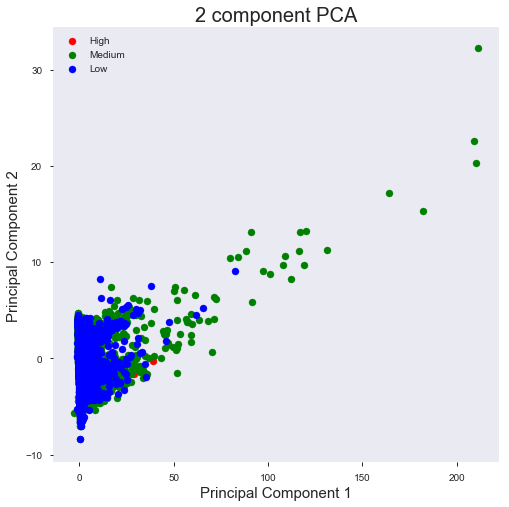

In [112]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['High', 'Medium', 'Low']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = plot_PCA['Risk_Description'] == target
    ax.scatter(plot_PCA.loc[indicesToKeep, 'principal component 1']
               , plot_PCA.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#### 2.3.3 Feature enfineering 3 - Numericals normalized + order categoricals for strings

In [113]:
def get_orders (data):
    
    data_out=pd.DataFrame()
    my_dict={}
    for column in data.columns:
        for index, label in zip(data[column].value_counts().index,range(1,data[column].shape[0]+1)):
            my_dict[index]=label

        data_out=pd.concat([data_out.reset_index(drop=True),data[column].apply(lambda x: my_dict[x])],axis=1)


    return data_out
    

In [114]:
df_orders= df_regression.select_dtypes(include=['object']).copy()
df_orders=pd.concat([df_orders.reset_index(drop=True), df_regression[['onboarding','customerType','jointAccount','residentStatus']].reset_index(drop=True)], axis=1)


In [115]:
df_orders=get_orders(df_orders)

In [116]:
df_fe_3= pd.concat([df_norm.reset_index(drop=True), df_orders.reset_index(drop=True)], axis=1)

## 3. Feature selection functions

Let's initialize functions to help to the feature selection:
* Chi squared
* Information Gain

In [117]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt


In [118]:
def get_variables_chi(data):
    class ChiSquare:
        def __init__(self, dataframe):
            self.data = dataframe
            self.p = None #P-Value
            self.chi2 = None #Chi Test Statistic
            self.dof = None
        
            self.dfTabular = None
            self.dfExpected = None
        
        def _print_chisquare_result(self, colX, alpha):
            result = ""
            if self.p<alpha:
                result="{0} is IMPORTANT for Prediction".format(colX)
            else:
                result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)
            print(result)
        def TestIndependence(self,colX,colY, alpha=0.05):
            X = self.data[colX].astype(str)
            Y = self.data[colY].astype(str)
        
            self.dfObserved = pd.crosstab(Y,X) 
            chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
            self.p = p
            self.chi2 = chi2
            self.dof = dof 
        
            self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
            self._print_chisquare_result(colX, alpha)

    data['dummyCat'] = np.random.choice([0, 1], size=(len(data),), p=[0.5, 0.5]) ##to test if the chi-sqare works properly

    #Initialize ChiSquare Class
    cT = ChiSquare(data)

    #Feature Selection for objects and category
    SelectedColumns = data.columns
    for var in SelectedColumns:
        cT.TestIndependence(colX=var,colY="rbaValue")
    

In [119]:
def get_variables_IG(data):
    y = data['rbaValue'] 
    X = data.drop(['rbaValue'],axis=1)

    y = y.astype(int) ##We are passing floats to a classifier which expects categorical values as the target vector. 
    ## We convert it to int it will be accepted as input.

    model = ExtraTreesClassifier()
    model.fit(X,y)
    print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
    #plot graph of feature importances for better visualization
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(10).plot(kind='barh')
    plt.show()

## 4. Regression model for rbaValue

First, we initialize the libraries to use the models

In [120]:
from sklearn import preprocessing
from sklearn import utils

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


### 4.1 Function definition for model evaluation

In [121]:
def regression_model(data,model, fe_set_up,scaler):

    x_train,x_test,y_train, y_test = train_test_split(data.drop('rbaValue', axis = 1),data['rbaValue'], test_size=0.2)
    
    model.fit(x_train,y_train)
    
    train_prediction = model.predict(x_train)
    test_prediction = model.predict(x_test)
    
    if scaler == 'None':
        mae_train = mean_absolute_error(y_train, train_prediction)
        mae_test = mean_absolute_error(y_test, test_prediction)
        
    else:
        y_train_unscaled = scaler.inverse_transform(pd.DataFrame(y_train))
        train_prediction_unscaled=scaler.inverse_transform(pd.DataFrame(train_prediction))
        
        y_test_unscaled = scaler.inverse_transform(pd.DataFrame(y_test))
        test_prediction_unscaled=scaler.inverse_transform(pd.DataFrame(test_prediction))
        
        mae_train = mean_absolute_error(y_train_unscaled, train_prediction_unscaled)
        mae_test = mean_absolute_error(y_test_unscaled, test_prediction_unscaled)

    results = pd.DataFrame([[fe_set_up,mae_train,mae_test]], columns= ["Feature engineering", "mae_train","mae_test"])
    
    
    return results

### 4.2 Feature engineering selection

#### 4.2.1 Feature engineer 0

###### Chi Squared

In [122]:
get_variables_chi(df_fe_0.select_dtypes(include=numerics))

age_in_year is IMPORTANT for Prediction
avg_last_10_days is NOT an important predictor. (Discard avg_last_10_days from model)
number_of_cash_dep_90_days is IMPORTANT for Prediction
avg_cash_deposit_90_days is IMPORTANT for Prediction
number_of_deposit_90_days is IMPORTANT for Prediction
avg_of_dep_90_days is IMPORTANT for Prediction
number_of_cash_wd_90_days is IMPORTANT for Prediction
avg_of_cash_wd_90_days is IMPORTANT for Prediction
number_of_wd_90_days is IMPORTANT for Prediction
avg_of_wd_90_days is IMPORTANT for Prediction
rbaValue is IMPORTANT for Prediction
onboarding is IMPORTANT for Prediction
customerType is IMPORTANT for Prediction
jointAccount is IMPORTANT for Prediction
residentStatus is IMPORTANT for Prediction
dummyCat is NOT an important predictor. (Discard dummyCat from model)


In [123]:
df_fe_0.dtypes

age_in_year                   float64
avg_last_10_days              float64
number_of_cash_dep_90_days      int64
avg_cash_deposit_90_days      float64
number_of_deposit_90_days       int64
avg_of_dep_90_days            float64
number_of_cash_wd_90_days       int64
avg_of_cash_wd_90_days        float64
number_of_wd_90_days            int64
avg_of_wd_90_days             float64
rbaValue                      float64
IQ                              uint8
JO                              uint8
OM                              uint8
Other                           uint8
EG                              uint8
IQ                              uint8
JO                              uint8
Other                           uint8
JO                              uint8
None                            uint8
US                              uint8
XK                              uint8
EUR                             uint8
JOD                             uint8
Other                           uint8
USD         

In [124]:
df_fe_0_chi = df_fe_0.drop(['avg_last_10_days'],axis=1)

###### Information gain

[1.77174350e-01 4.95269347e-01 1.41591006e-02 2.23500969e-02
 1.73395839e-02 3.08482681e-02 8.79032721e-03 2.25574817e-02
 1.08368120e-02 2.52466184e-02 3.41708689e-04 9.94046654e-04
 3.06897272e-04 7.78340185e-04 1.52734364e-03 1.40307286e-03
 4.76087123e-03 2.98774874e-03 1.21113529e-04 1.06617229e-03
 6.37486286e-04 7.38842286e-04 4.29518485e-04 3.74610457e-03
 3.54240513e-04 2.74031155e-03 1.55070693e-02 9.04637884e-04
 2.77638815e-02 1.82140853e-02 3.07922604e-04 3.75838803e-02
 4.24348070e-02 4.26134721e-03 6.56469169e-04 4.03260212e-03
 8.27492927e-04]


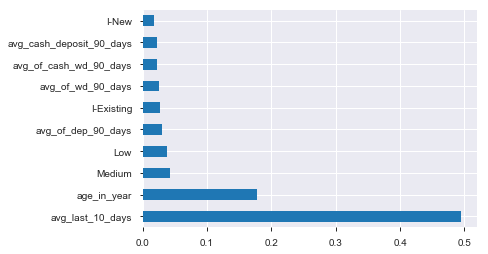

In [126]:
get_variables_IG(df_fe_0)

In [127]:
df_fe_0_ig = df_fe_0.loc[:,['avg_last_10_days','age_in_year','rbaValue']]

#### 4.2.2 Feature engineer 1

##### Chi square

In [128]:
get_variables_chi(df_fe_1.select_dtypes(include=numerics))

age_in_year is IMPORTANT for Prediction
avg_last_10_days is NOT an important predictor. (Discard avg_last_10_days from model)
number_of_cash_dep_90_days is IMPORTANT for Prediction
avg_cash_deposit_90_days is IMPORTANT for Prediction
number_of_deposit_90_days is IMPORTANT for Prediction
avg_of_dep_90_days is IMPORTANT for Prediction
number_of_cash_wd_90_days is IMPORTANT for Prediction
avg_of_cash_wd_90_days is IMPORTANT for Prediction
number_of_wd_90_days is IMPORTANT for Prediction
avg_of_wd_90_days is IMPORTANT for Prediction
rbaValue is IMPORTANT for Prediction
onboarding is IMPORTANT for Prediction
customerType is IMPORTANT for Prediction
jointAccount is IMPORTANT for Prediction
residentStatus is IMPORTANT for Prediction
dummyCat is NOT an important predictor. (Discard dummyCat from model)


In [129]:
df_fe_1_chi = df_fe_1.drop(['avg_last_10_days'],axis=1)

##### Information Gain

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


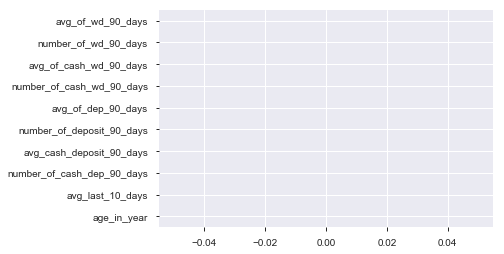

In [130]:
get_variables_IG(df_fe_1)

There is no version of df_fe_1 for information gain

#### 4.2.3 Feature engineer 2

##### Chi Square

In [131]:
get_variables_chi(df_fe_2.select_dtypes(include=numerics))

principal component 1 is IMPORTANT for Prediction
principal component 2 is IMPORTANT for Prediction
rbaValue is IMPORTANT for Prediction
dummyCat is NOT an important predictor. (Discard dummyCat from model)


There is no version of df_fe_2 for Chi analysis, since it is the same than df_fe_2

##### Information Gain

[0.46343889 0.53656111]


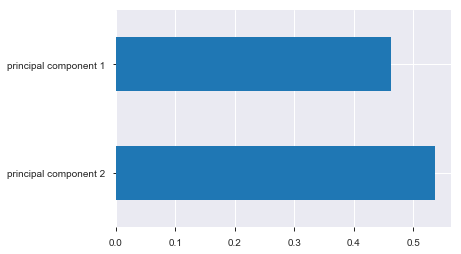

In [132]:
get_variables_IG(df_fe_2)

There is no version of df_fe_2 for IG analysis, since it is the same than df_fe_2

#### 4.2.4 Feature engineer 3

##### Chi Square

In [133]:
get_variables_chi(df_fe_3.select_dtypes(include=numerics))

age_in_year is IMPORTANT for Prediction
avg_last_10_days is NOT an important predictor. (Discard avg_last_10_days from model)
number_of_cash_dep_90_days is IMPORTANT for Prediction
avg_cash_deposit_90_days is IMPORTANT for Prediction
number_of_deposit_90_days is IMPORTANT for Prediction
avg_of_dep_90_days is IMPORTANT for Prediction
number_of_cash_wd_90_days is IMPORTANT for Prediction
avg_of_cash_wd_90_days is IMPORTANT for Prediction
number_of_wd_90_days is IMPORTANT for Prediction
avg_of_wd_90_days is IMPORTANT for Prediction
rbaValue is IMPORTANT for Prediction
residentCountry is IMPORTANT for Prediction
nationalityOriginal is IMPORTANT for Prediction
extraNationality is IMPORTANT for Prediction
accountCurrency is IMPORTANT for Prediction
score_card is IMPORTANT for Prediction
Risk_Description is IMPORTANT for Prediction
onboarding is IMPORTANT for Prediction
customerType is IMPORTANT for Prediction
jointAccount is IMPORTANT for Prediction
residentStatus is IMPORTANT for Prediction

In [134]:
df_fe_3_chi = df_fe_3.drop(['avg_last_10_days'],axis=1)

##### Information gain

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


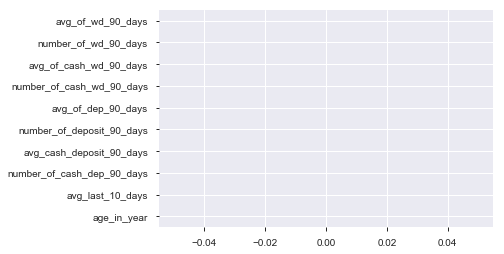

In [135]:
get_variables_IG(df_fe_3)

There is no version of df_fe_3 for IG analysis, since no variables show high importance

### 4.3 Model calculation and evaluation

In [136]:
results = pd.DataFrame(columns=["Feature engineering", "mae_train","mae_test"])

model_1 = LinearRegression()
model_2 = Lasso()
model_3 = Ridge()
model_4 = ElasticNet()
model_4 = RandomForestRegressor()
model_5 = GradientBoostingRegressor()



models_list = [model_1,model_2,model_3, model_4, model_5]
model_names = ['LinearRegression','Lasso','Rige','ElasticNet','RandomForest','GradientBoost']

df_list= [df_fe_0,df_fe_1,df_fe_2,df_fe_3,df_fe_0_chi,df_fe_0_ig,df_fe_1_chi,df_fe_3_chi]
df_names=['df_fe_0','df_fe_1','df_fe_2','df_fe_3','df_fe_0_chi','df_fe_0_ig','df_fe_1_chi','df_fe_3_chi']


scaler_list=['None',scaler_fe1_y,'None','None','None','None',scaler_fe1_y,'None']

In [137]:
cont_df=0
for df_fe in df_list:
    cont_model=0
    scaler=scaler_list[cont_df]
    for model in models_list:
        name = ("FE: "+str(df_names[cont_df])+" | Model: "+str(model_names[cont_model]))
        results_temp = regression_model(df_fe,model,name,scaler)
        results=pd.concat([results.reset_index(drop=True), results_temp], axis=0)
        cont_model=cont_model+1
    
    cont_df= cont_df+1
    
results

Feature engineering  mae_train  mae_test
0       FE: df_fe_0 | Model: LinearRegression   3.647021  3.625888
1                  FE: df_fe_0 | Model: Lasso   3.813448  3.795988
2                   FE: df_fe_0 | Model: Rige   3.646147  3.642982
3             FE: df_fe_0 | Model: ElasticNet   2.005598  3.263033
4           FE: df_fe_0 | Model: RandomForest   3.439409  3.442204
5       FE: df_fe_1 | Model: LinearRegression   3.644353  3.643280
6                  FE: df_fe_1 | Model: Lasso   5.976766  5.923910
7                   FE: df_fe_1 | Model: Rige   3.641528  3.644013
8             FE: df_fe_1 | Model: ElasticNet   2.257197  3.288846
9           FE: df_fe_1 | Model: RandomForest   3.438259  3.439436
10      FE: df_fe_2 | Model: LinearRegression   5.832291  5.836575
11                 FE: df_fe_2 | Model: Lasso   5.880366  5.813396
12                  FE: df_fe_2 | Model: Rige   5.845014  5.782356
13            FE: df_fe_2 | Model: ElasticNet   2.778042  4.971310
14          FE: df_fe_2 | Model: RandomForest   5.207208  5.233454
15      FE: df_fe_3 | Model: LinearRegression   0.039468  0.039767
16                 FE: df_fe_3 | Model: Lasso   0.062174  0.062115
17                  FE: df_fe_3 | Model: Rige   0.039573  0.039607
18            FE: df_fe_3 | Model: ElasticNet   0.022919  0.032788
19          FE: df_fe_3 | Model: RandomForest   0.035170  0.035218
20  FE: df_fe_0_chi | Model: LinearRegression   3.638661  3.642243
21             FE: df_fe_0_chi | Model: Lasso   3.810176  3.817052
22              FE: df_fe_0_chi | Model: Rige   3.637905  3.647875
23        FE: df_fe_0_chi | Model: ElasticNet   2.745589  3.199275
24      FE: df_fe_0_chi | Model: RandomForest   3.432784  3.479782
25   FE: df_fe_0_ig | Model: LinearRegression   5.948086  5.990138
26              FE: df_fe_0_ig | Model: Lasso   5.954551  5.989066
27               FE: df_fe_0_ig | Model: Rige   5.960077  5.954296
28         FE: df_fe_0_ig | Model: ElasticNet   3.843160  6.052810
29       FE: df_fe_0_ig | Model: RandomForest   5.488319  5.529251
30  FE: df_fe_1_chi | Model: LinearRegression   3.640932  3.653338
31             FE: df_fe_1_chi | Model: Lasso   5.974317  5.929224
32              FE: df_fe_1_chi | Model: Rige   3.646928  3.625614
33        FE: df_fe_1_chi | Model: ElasticNet   2.750597  3.189265
34      FE: df_fe_1_chi | Model: RandomForest   3.441502  3.449816
35  FE: df_fe_3_chi | Model: LinearRegression   0.039646  0.039439
36             FE: df_fe_3_chi | Model: Lasso   0.062042  0.062580
37              FE: df_fe_3_chi | Model: Rige   0.039613  0.039510
38        FE: df_fe_3_chi | Model: ElasticNet   0.027672  0.032425
0       FE: df_fe_3_chi | Model: RandomForest   0.035243  0.035273

Finally, we can display the dataframes configurations and models that provide the best results, by ordering the results by 'mae_test'

In [138]:
results.sort_values('mae_test').head()

Feature engineering  mae_train  mae_test
38        FE: df_fe_3_chi | Model: ElasticNet   0.027672  0.032425
18            FE: df_fe_3 | Model: ElasticNet   0.022919  0.032788
19          FE: df_fe_3 | Model: RandomForest   0.035170  0.035218
0       FE: df_fe_3_chi | Model: RandomForest   0.035243  0.035273
35  FE: df_fe_3_chi | Model: LinearRegression   0.039646  0.039439

## 5. Classification model for Risk_Description

### 5.1 Dataframes preparation for classification

First, we have to prepare the different feature engineering set ups for the classification

In [139]:
df.loc[df['Risk_Description']=='Low',['Risk_Description']]=0
df.loc[df['Risk_Description']=='Medium',['Risk_Description']]=1
df.loc[df['Risk_Description']=='High',['Risk_Description']]=1

In [140]:
df_fe_0_class = df_fe_0.copy()
df_fe_0_class = df_fe_0_class.drop(['High','Medium','Low','rbaValue'],axis=1)
df_fe_0_class = pd.concat([df_fe_0_class.reset_index(drop=True),df.Risk_Description.reset_index(drop=True)],axis=1)

In [141]:
df_fe_1_class = df_fe_1.copy()
df_fe_1_class = df_fe_1_class.drop(['High','Medium','Low','rbaValue'],axis=1)
df_fe_1_class = pd.concat([df_fe_1_class.reset_index(drop=True),df.Risk_Description.reset_index(drop=True)],axis=1)

In [142]:
df_fe_3.dtypes

age_in_year                   float64
avg_last_10_days              float64
number_of_cash_dep_90_days    float64
avg_cash_deposit_90_days      float64
number_of_deposit_90_days     float64
avg_of_dep_90_days            float64
number_of_cash_wd_90_days     float64
avg_of_cash_wd_90_days        float64
number_of_wd_90_days          float64
avg_of_wd_90_days             float64
rbaValue                      float64
residentCountry                 int64
nationalityOriginal             int64
extraNationality                int64
accountCurrency                 int64
score_card                      int64
Risk_Description                int64
onboarding                      int64
customerType                    int64
jointAccount                    int64
residentStatus                  int64
dtype: object

In [143]:
df_fe_3_class = df_fe_3.copy()
df_fe_3_class = df_fe_3_class.drop(['Risk_Description','rbaValue'],axis=1)
df_fe_3_class = pd.concat([df_fe_3_class.reset_index(drop=True),df.Risk_Description.reset_index(drop=True)],axis=1)

Then, we import the libraries with the models and metrics to be used

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Let's build a function to industrialize the trial of different dataframes and models:

In [145]:
def classification_model(data,model, fe_set_up):

    x_train,x_test,y_train, y_test = train_test_split(data.drop('Risk_Description',axis=1),data['Risk_Description'], test_size=0.2)
    
    model.fit(x_train,y_train)
    
    train_prediction = model.predict(x_train)
    test_prediction = model.predict(x_test)
    
    accuracy_train = accuracy_score(y_train, train_prediction)
    accuracy_test = accuracy_score(y_test, test_prediction)
       
    results = pd.DataFrame([[fe_set_up,accuracy_train,accuracy_test]], columns= ["Feature engineering", "accuracy_train","accuracy_test"])
    
    return results

In [146]:
results_classification = pd.DataFrame(columns=["Feature engineering", "accuracy_train","accuracy_test"])

model_1 = LogisticRegression()
model_2 = RidgeClassifier()
model_3 = GradientBoostingClassifier()
model_4 = RandomForestClassifier()

models_list = [model_1,model_2,model_3,model_4]
model_names = ['LogisticRegression','RidgeClassifier','GradientBoostingClassifier','RandomForestClassifier']

df_list= [df_fe_0_class,df_fe_1_class,df_fe_3_class]
df_names =['df_fe_0_class','df_fe_1_class','df_fe_3_class'] 


In [147]:
cont_df=0
for df_fe in df_list:
    cont_model=0
    for model in models_list:
        name = ("FE_"+str(df_names[cont_df])+" | model_"+str(model_names[cont_model]))
        results_temp = classification_model(df_fe,model,name)
        results_classification=pd.concat([results_classification.reset_index(drop=True), results_temp], axis=0)
        cont_model=cont_model+1
    
    cont_df= cont_df+1

results_classification

Feature engineering  accuracy_train  \
0         FE_df_fe_0_class | model_LogisticRegression        0.712612   
1            FE_df_fe_0_class | model_RidgeClassifier        0.750809   
2   FE_df_fe_0_class | model_GradientBoostingClass...        0.791162   
3     FE_df_fe_0_class | model_RandomForestClassifier        0.895440   
4         FE_df_fe_1_class | model_LogisticRegression        0.750143   
5            FE_df_fe_1_class | model_RidgeClassifier        0.748704   
6   FE_df_fe_1_class | model_GradientBoostingClass...        0.788851   
7     FE_df_fe_1_class | model_RandomForestClassifier        0.871530   
8         FE_df_fe_3_class | model_LogisticRegression        0.733746   
9            FE_df_fe_3_class | model_RidgeClassifier        0.725809   
10  FE_df_fe_3_class | model_GradientBoostingClass...        0.790078   
0     FE_df_fe_3_class | model_RandomForestClassifier        0.873853   

    accuracy_test  
0        0.715973  
1        0.744374  
2        0.790783  
3        0.772889  
4        0.749834  
5        0.752197  
6        0.791998  
7        0.782501  
8        0.730655  
9        0.725792  
10       0.790301  
0        0.784222

In [148]:
results_classification.sort_values('accuracy_test',ascending=False).head()

Feature engineering  accuracy_train  \
6   FE_df_fe_1_class | model_GradientBoostingClass...        0.788851   
2   FE_df_fe_0_class | model_GradientBoostingClass...        0.791162   
10  FE_df_fe_3_class | model_GradientBoostingClass...        0.790078   
0     FE_df_fe_3_class | model_RandomForestClassifier        0.873853   
7     FE_df_fe_1_class | model_RandomForestClassifier        0.871530   

    accuracy_test  
6        0.791998  
2        0.790783  
10       0.790301  
0        0.784222  
7        0.782501